<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names
print("Column Names:")
print(df.columns)

print("\n" + "="*50 + "\n") # Separator

# Display data types and non-null counts
print("Data Info:")
df.info()

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# List of key columns to analyze
key_columns = ['Employment', 'JobSat', 'YearsCodePro']

# Loop through the columns and print their value counts
for col in key_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print("-" * 30)


Value counts for Employment:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


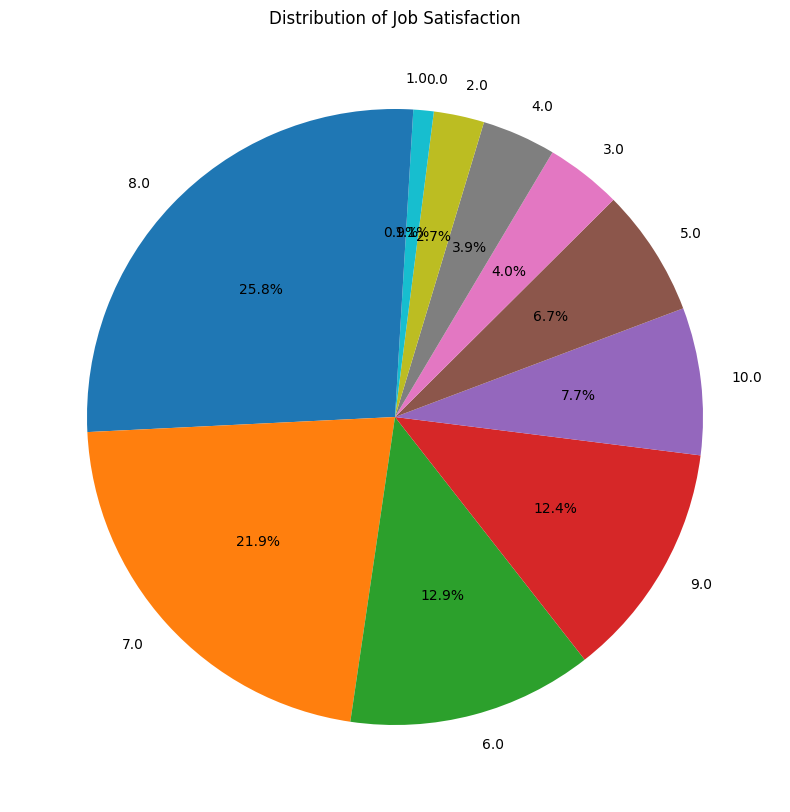

In [6]:
## Write your code here
# Create a pie chart for the 'JobSat' column
df['JobSat'].value_counts().plot(kind='pie',
                                figsize=(10, 10),
                                autopct='%1.1f%%', # Add percentages to slices
                                startangle=90)

plt.title('Distribution of Job Satisfaction')
plt.ylabel('') # Hide the y-label for a cleaner look
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


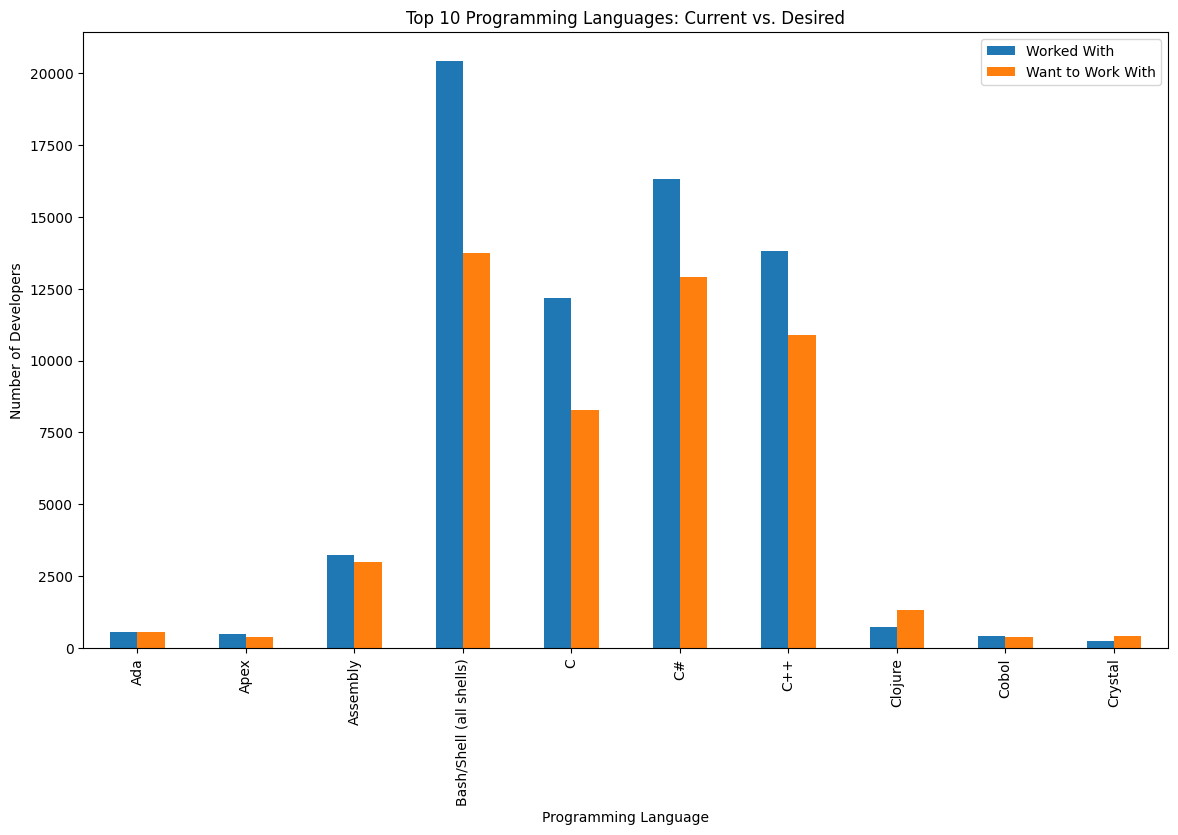

In [7]:
## Write your code here
# Function to split and count items in a semicolon-separated column
def get_counts(column_name):
    return df[column_name].str.split(';', expand=True).stack().value_counts()

# Get the counts for both columns
worked_with_counts = get_counts('LanguageHaveWorkedWith')
want_to_work_with_counts = get_counts('LanguageWantToWorkWith')

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Worked With': worked_with_counts,
    'Want to Work With': want_to_work_with_counts
}).head(10) # Limit to top 10 for readability

# Create a grouped bar chart
comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top 10 Programming Languages: Current vs. Desired')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


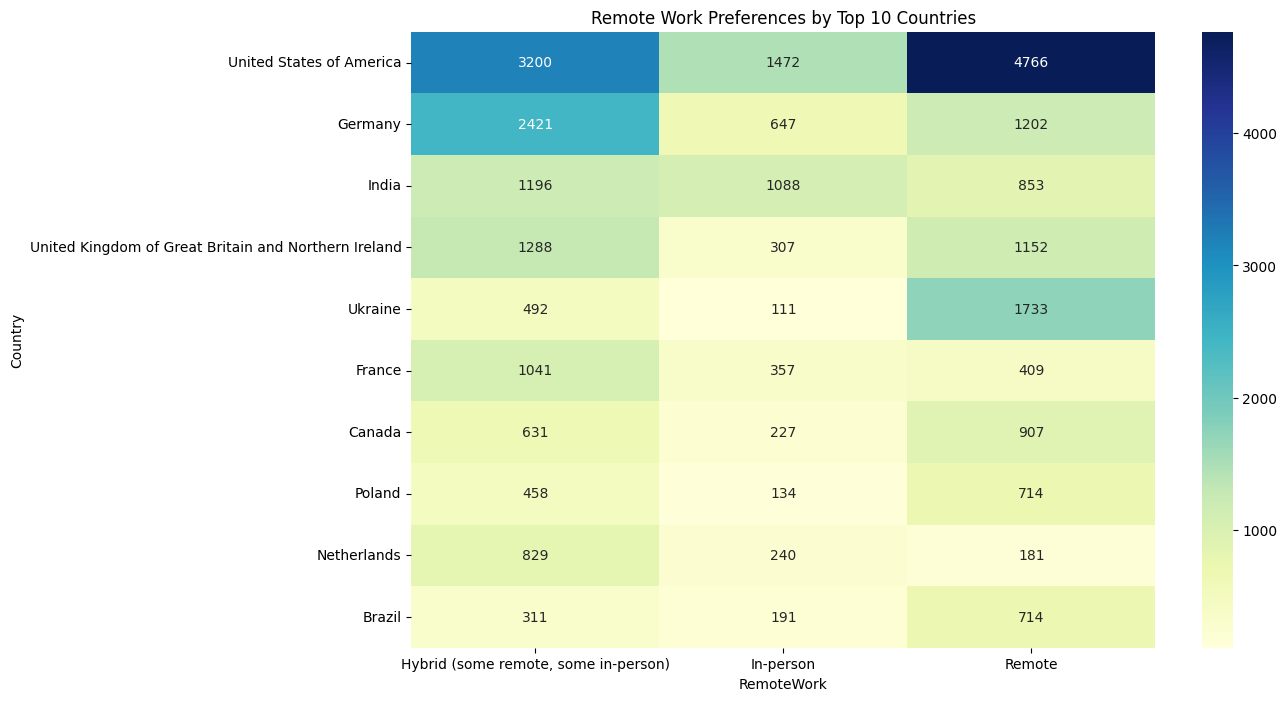

In [8]:
## Write your code here
# Create a cross-tabulation of RemoteWork by Country
remote_by_country = pd.crosstab(df['Country'], df['RemoteWork'])

# To make the heatmap readable, let's focus on the top 10 countries by respondent count
top_10_countries = df['Country'].value_counts().head(10).index
remote_by_top_countries = remote_by_country.loc[top_10_countries]

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(remote_by_top_countries, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Remote Work Preferences by Top 10 Countries')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [9]:
## Write your code here
# Convert columns to numeric, coercing errors to NaN
df['JobSat_numeric'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Calculate the Pearson correlation
correlation = df['JobSat_numeric'].corr(df['YearsCodePro_numeric'])

print(f"The Pearson correlation between Job Satisfaction and Years of Professional Coding is: {correlation:.2f}")

The Pearson correlation between Job Satisfaction and Years of Professional Coding is: 0.10


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


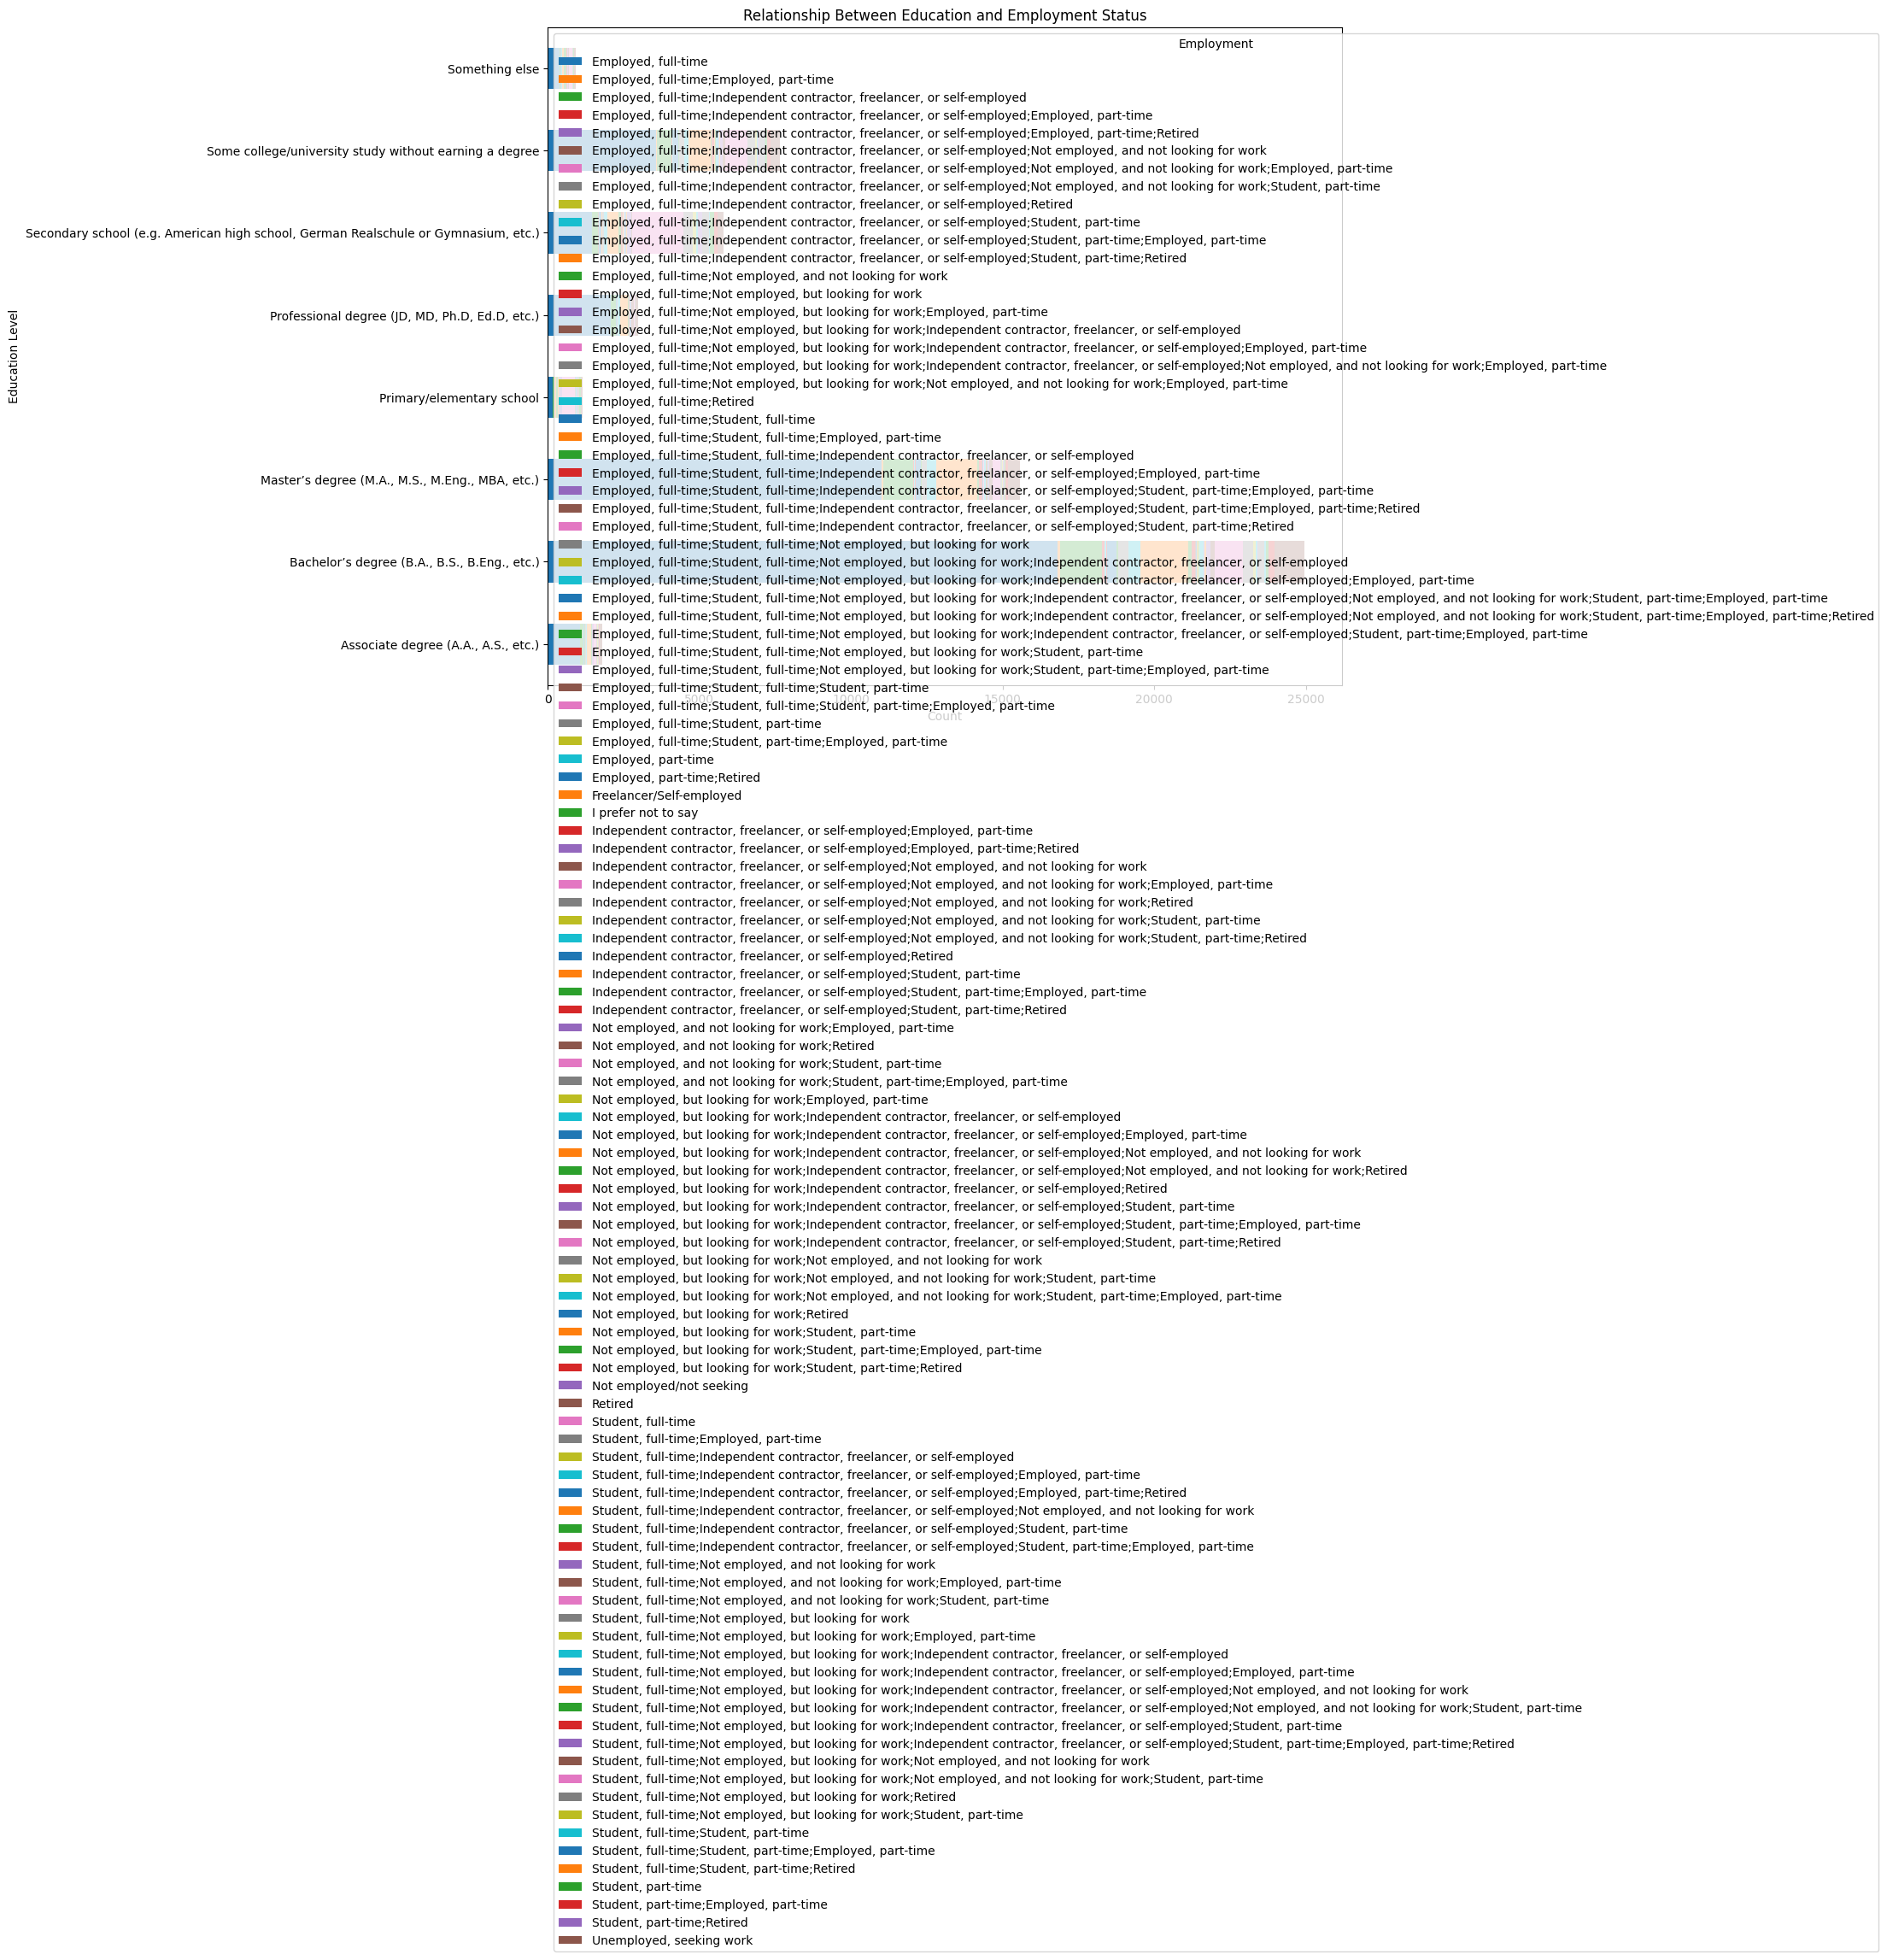

In [14]:
## Write your code here

# Create a copy for visualization to keep the original data safe
df_viz = df.copy()

# Define a mapping to shorten the long 'Employment' labels
employment_mapping = {
    'Independent contractor, freelancer, or self-employed': 'Freelancer/Self-employed',
    'Not employed, but looking for work': 'Unemployed, seeking work',
    'Employed, full-time': 'Employed, full-time',
    'Employed, part-time': 'Employed, part-time',
    'Student, full-time': 'Student, full-time',
    'Not employed, and not looking for work': 'Not employed/not seeking',
    'Student, part-time': 'Student, part-time'
    # 'Retired' is short enough and can be left as is
}

# Apply the mapping to the 'Employment' column in our new DataFrame
df_viz['Employment'] = df_viz['Employment'].replace(employment_mapping)

# Create the cross-tabulation using the cleaned data
cross_tab_cleaned = pd.crosstab(df_viz['EdLevel'], df_viz['Employment'])

# Create the stacked bar plot
cross_tab_cleaned.plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Relationship Between Education and Employment Status')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [15]:
## Write your code here
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

# Print a confirmation message
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
